In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
file_path = 'processed_financial_loan.csv'
data = pd.read_csv(file_path, delimiter=',', encoding='latin1')


In [3]:
# Корреляция между грейдом и суммой кредита
if 'sub_grade' in data.columns and 'loan_amount' in data.columns:
    grade_loan_corr = data['grade'].astype('category').cat.codes.corr(data['loan_amount'])
    print(f"Корреляция между грейдом и суммой кредита: {grade_loan_corr}")
else:
    print("'grade' или 'loan_amount' отсутствует в данных")

Корреляция между грейдом и суммой кредита: 0.2887640401999843


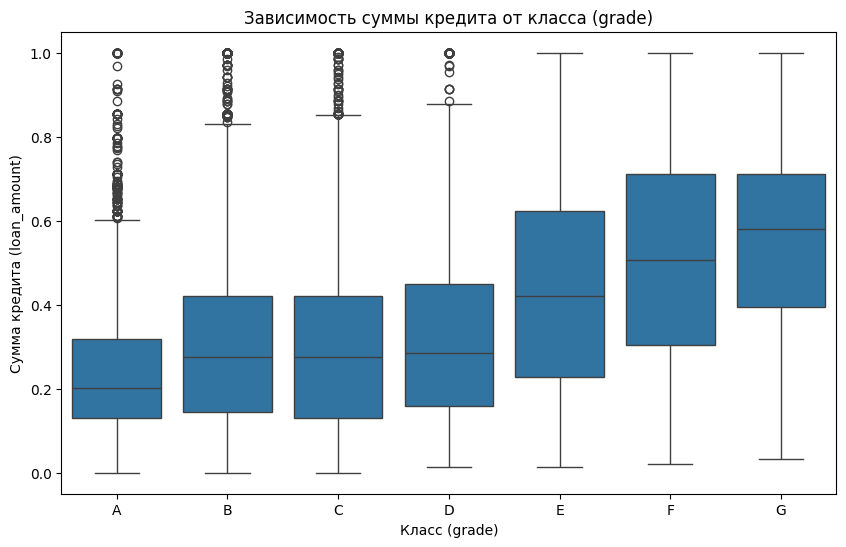

In [7]:
plt.figure(figsize=(10, 6))
grade_order=['A','B','C','D','E','F','G']
sns.boxplot(x='grade', y='loan_amount', data=data,order=grade_order)
plt.title('Зависимость суммы кредита от класса (grade)')
plt.xlabel('Класс (grade)')
plt.ylabel('Сумма кредита (loan_amount)')
plt.show()

In [53]:
# Корреляция между назначением кредита и сроком
purpose_term_corr = data['purpose'].astype('category').cat.codes.corr(data['term'].astype('category').cat.codes)
print(f"Корреляция между назначением кредита и сроком: {purpose_term_corr}")

Корреляция между назначением кредита и сроком: -0.0470032299144406


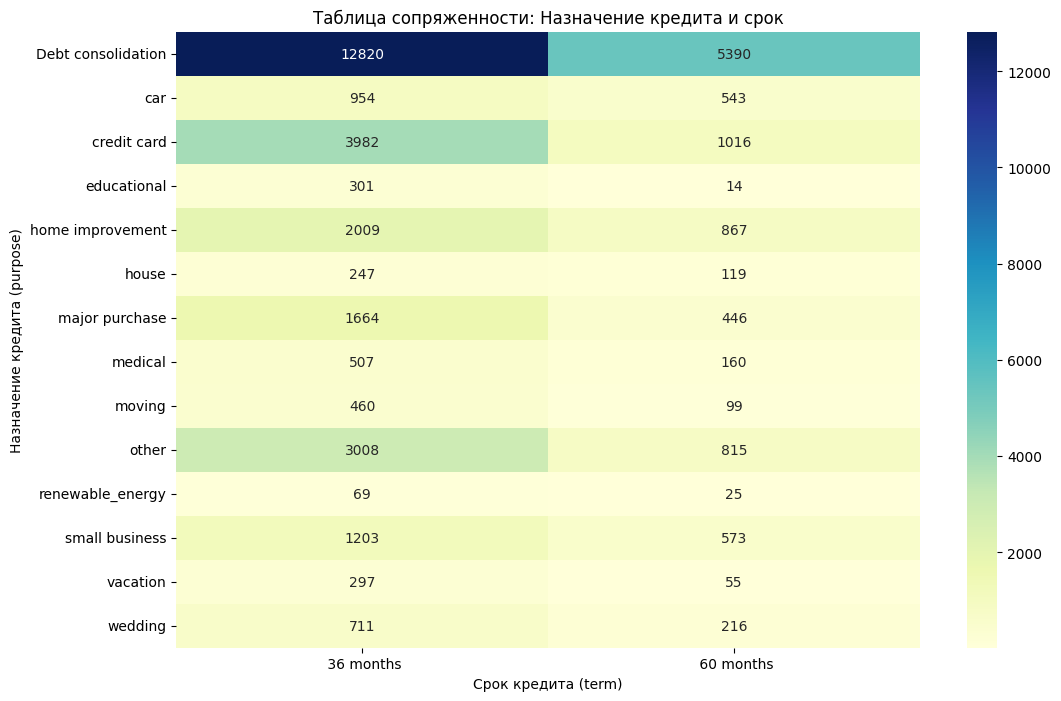

In [72]:
# Plot purpose vs term using heatmap for the crosstab

purpose_term_crosstab = pd.crosstab(data['purpose'], data['term'])
plt.figure(figsize=(12, 8))
sns.heatmap(purpose_term_crosstab, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Таблица сопряженности: Назначение кредита и срок')
plt.xlabel('Срок кредита (term)')
plt.ylabel('Назначение кредита (purpose)')
plt.show()

In [65]:
# Корреляция между годовым доходом и отношением долговых обязательств к доходам
annual_income_dti_corr = data['annual_income'].corr(data['dti'])
print(f"Корреляция между годовым доходом и отношением долговых обязательств к доходам: {annual_income_dti_corr}")

Корреляция между годовым доходом и отношением долговых обязательств к доходам: -0.12485166441239628


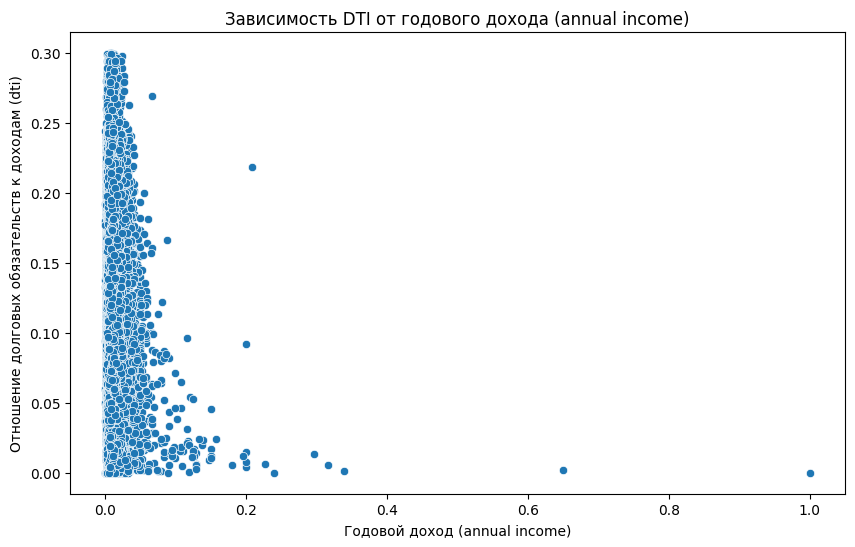

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='dti', data=data)
plt.title('Зависимость DTI от годового дохода (annual income)')
plt.xlabel('Годовой доход (annual income)')
plt.ylabel('Отношение долговых обязательств к доходам (dti)')
plt.show()